In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
file_path = '/content/drive/MyDrive/MidProject/Video_Games.csv'
df = pd.read_csv(file_path)

In [6]:
!pip install pandas openpyxl

In [7]:
df =pd.read_csv(file_path)
print(df)

                                Name Platform  Year_of_Release         Genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16714  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16715               LMA Manager 2007     X360           2006.0        Sports   
16716        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16717               Spirits & Spells      GBA           2003.0      Platform   
16718            Winning Post 8 2016      PSV           2016.0    Simulation   

          Publisher  NA_Sales  EU_Sales

In [8]:
df.isnull().sum()

,0
Name,2
Platform,0
Year_of_Release,269
Genre,2
Publisher,54
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0
Global_Sales,0


In [9]:
df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

# What were the top 30 games in terms of sales globaly?

In [10]:
topglobal = df[['Name','Platform', 'Global_Sales']].sort_values(by="Global_Sales",ascending=False)

In [11]:
topglobal.head(10)

,Name,Platform,Global_Sales
0,Wii Sports,Wii,82.53
1,Super Mario Bros.,NES,40.24
2,Mario Kart Wii,Wii,35.52
3,Wii Sports Resort,Wii,32.77
4,Pokemon Red/Pokemon Blue,GB,31.37
5,Tetris,GB,30.26
6,New Super Mario Bros.,DS,29.80
7,Wii Play,Wii,28.92
8,New Super Mario Bros. Wii,Wii,28.32
9,Duck Hunt,NES,28.31


Start with Global Sales

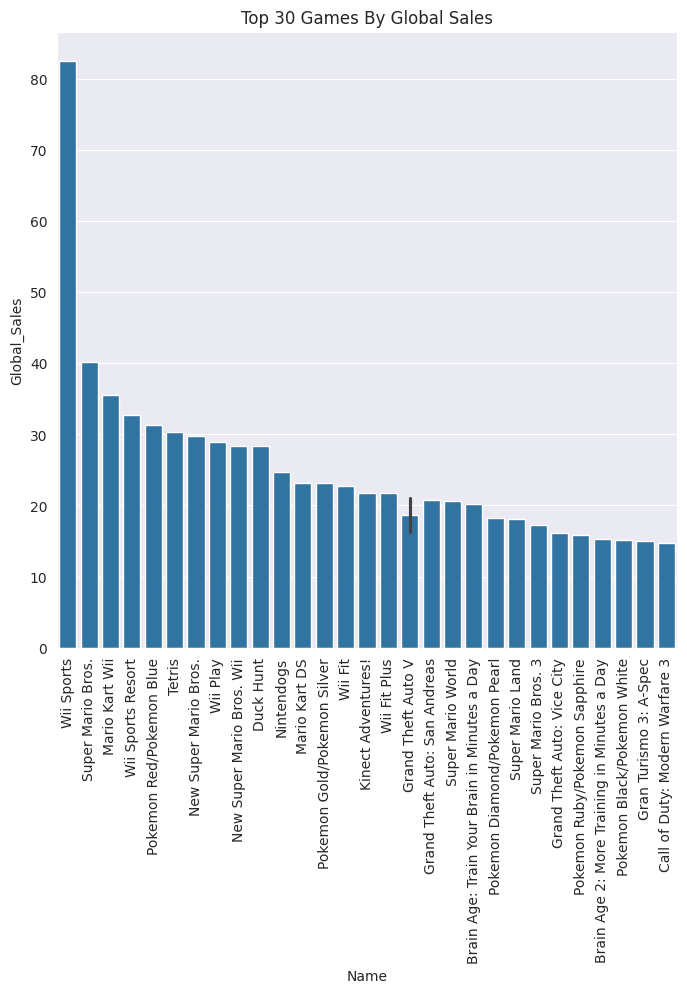

In [12]:
topglobal = topglobal.head(30)
plt.figure(figsize=(8,8))
graph=sns.barplot(y='Global_Sales',x='Name',data=topglobal)
graph.set_title('Top 30 Games By Global Sales')
plt.xticks(rotation=90)
plt.show()

With Global sales, what were the most frequent console within top 30?

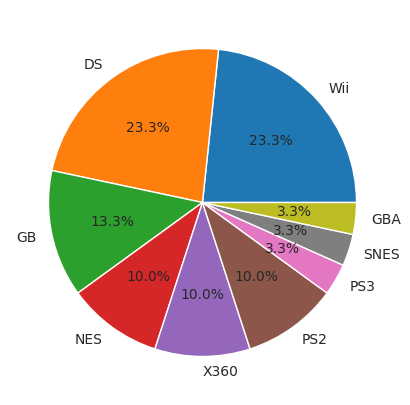

In [13]:
topglobal.Platform.value_counts().plot(kind='pie', figsize=(12,5),autopct='%0.1f%%')
plt.ylabel('')
plt.show()

# Summary of top 30 sales across all places EU, NA, JP and Other (excluding Global)

In [14]:
topeu = df[['Name','Platform', 'EU_Sales']].sort_values(by="EU_Sales",ascending=False)
topeu = topeu.head(30)
topother = df[['Name','Platform', 'Other_Sales']].sort_values(by="Other_Sales",ascending=False)
topother = topother.head(30)
topjap = df[['Name','Platform', 'JP_Sales']].sort_values(by="JP_Sales",ascending=False)
topjap = topjap.head(30)
topna = df[['Name','Platform', 'NA_Sales']].sort_values(by="NA_Sales",ascending=False)
topna = topna.head(30)

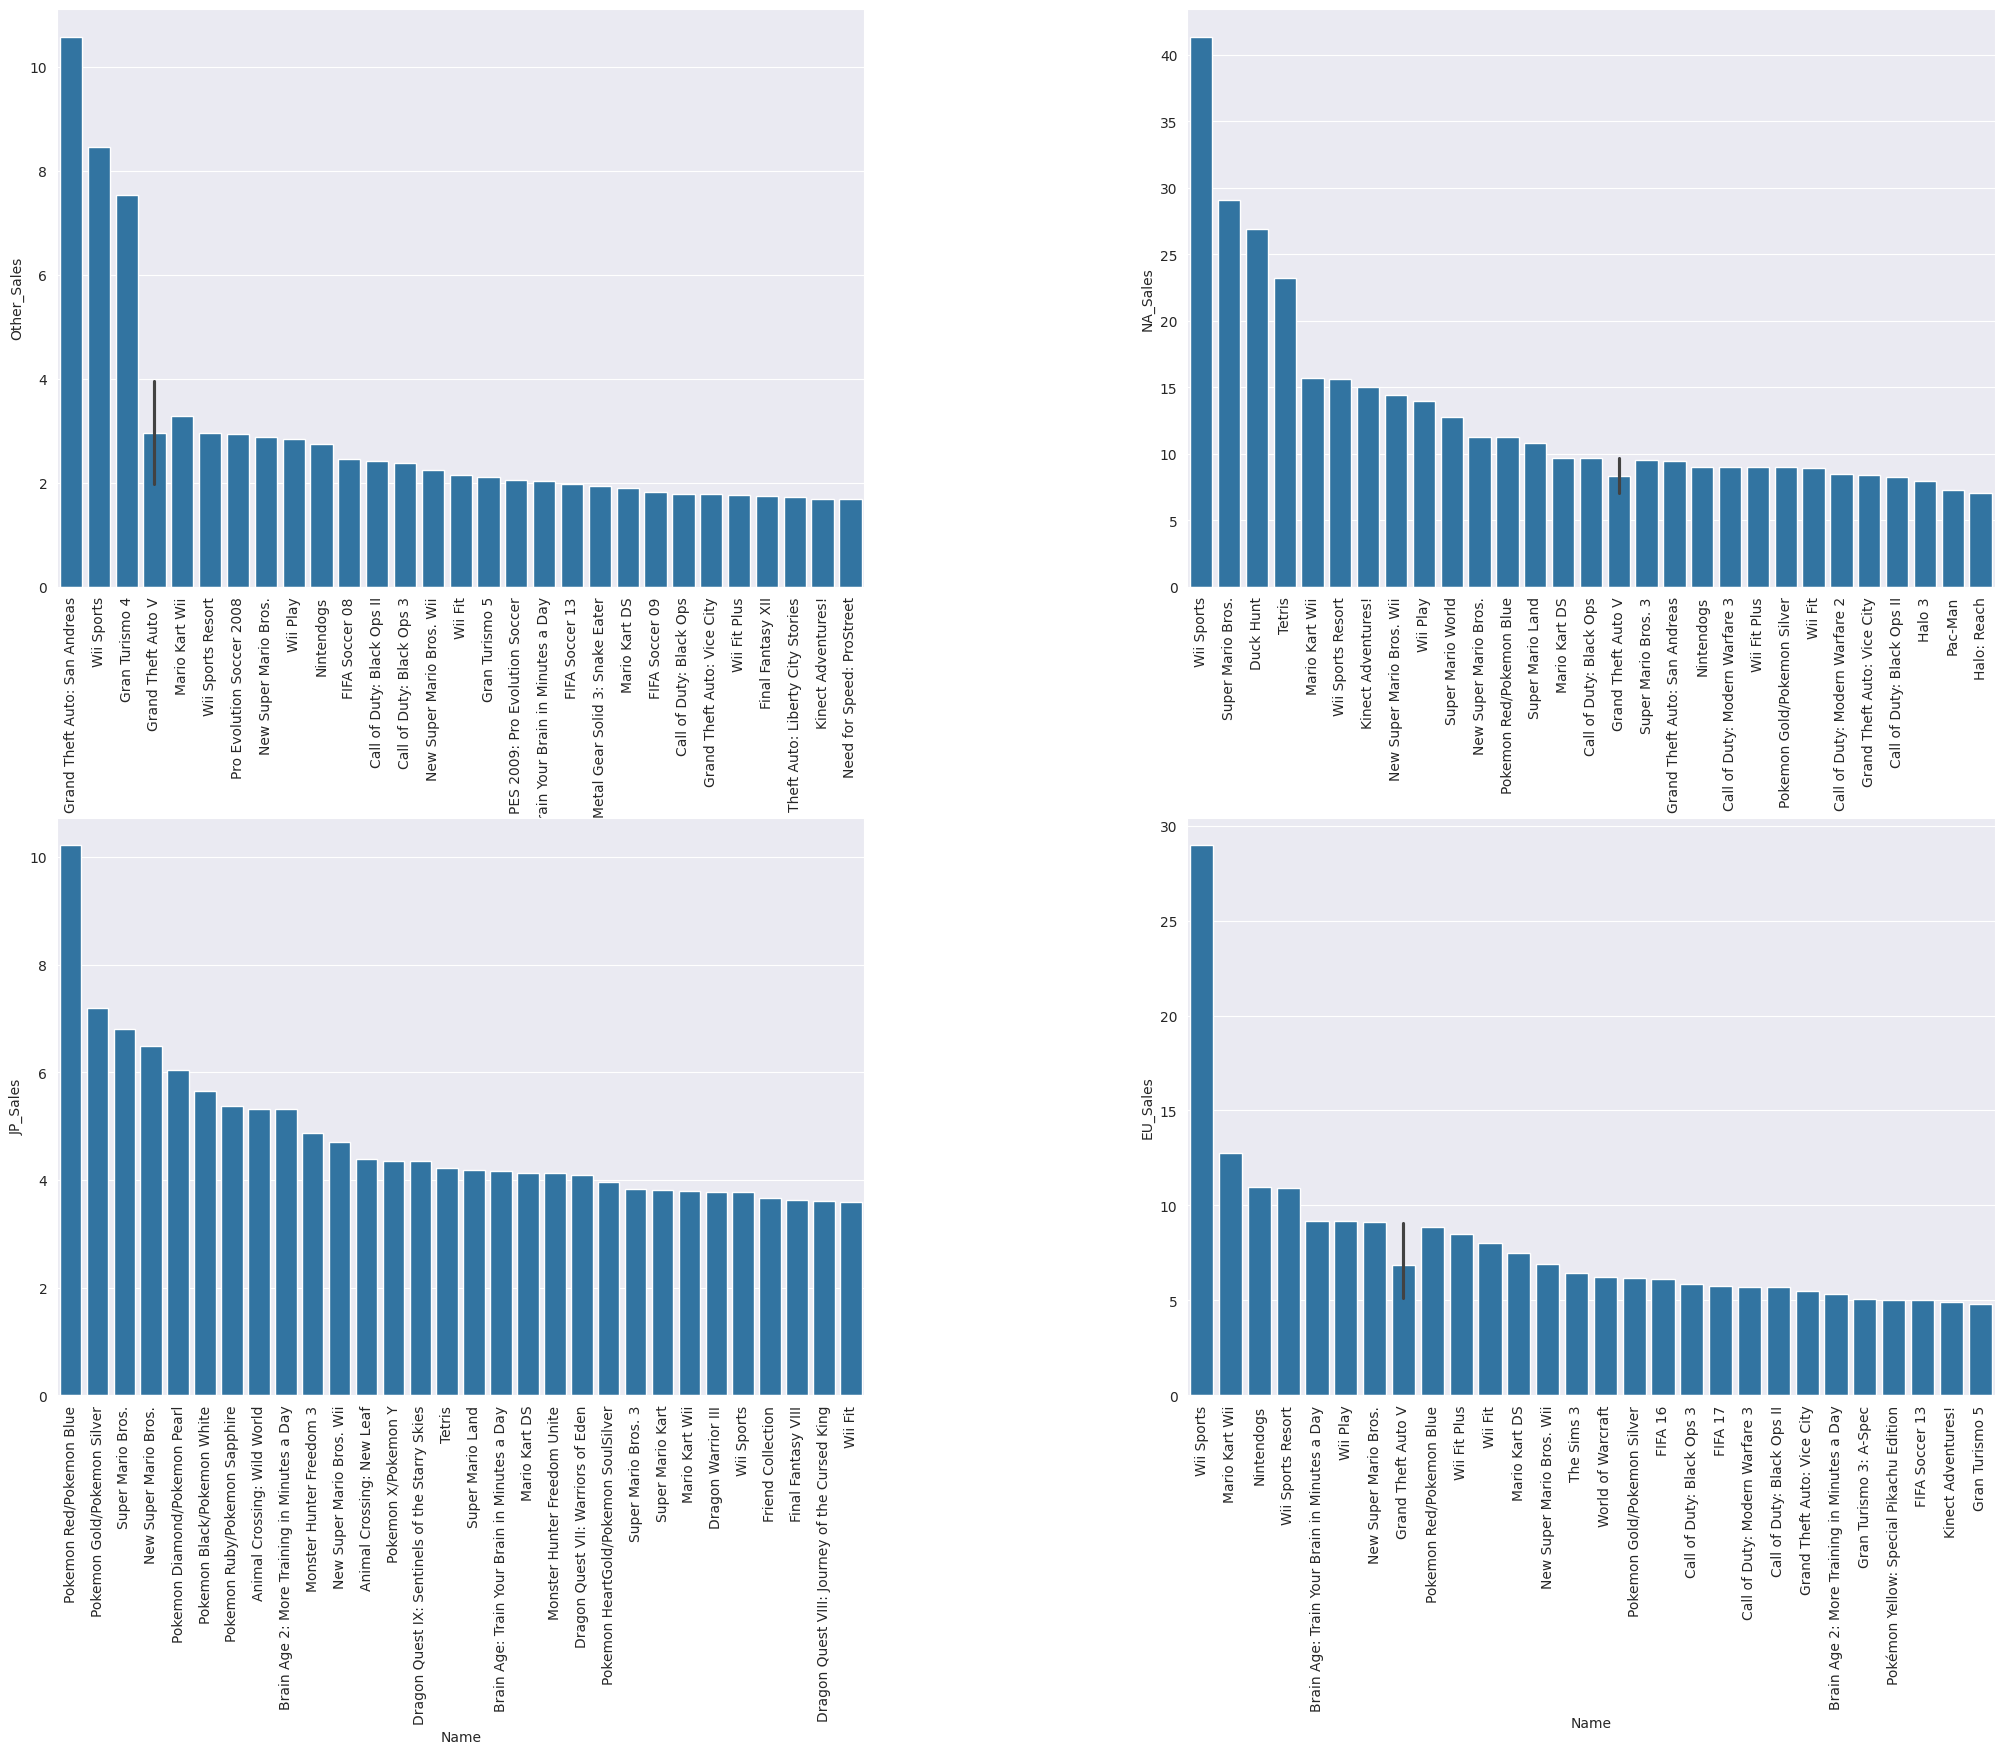

In [15]:
fig, axes = plt.subplots(2, 2, sharey=False, figsize=(25, 18))
sns.barplot(y='NA_Sales',x='Name',data=topna,ax=axes[0, 1])
sns.barplot(y='JP_Sales',x='Name',data=topjap,ax=axes[1, 0])
sns.barplot(y='Other_Sales',x='Name',data=topother,ax=axes[0, 0])
sns.barplot(y='EU_Sales',x='Name',data=topeu,ax=axes[1, 1])
plt.subplots_adjust(wspace=0.4, hspace=0.4)
for ax in axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

# Frequency of Platforms

In [16]:
df.head(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


Frequency of platforms overall (in pecentages)

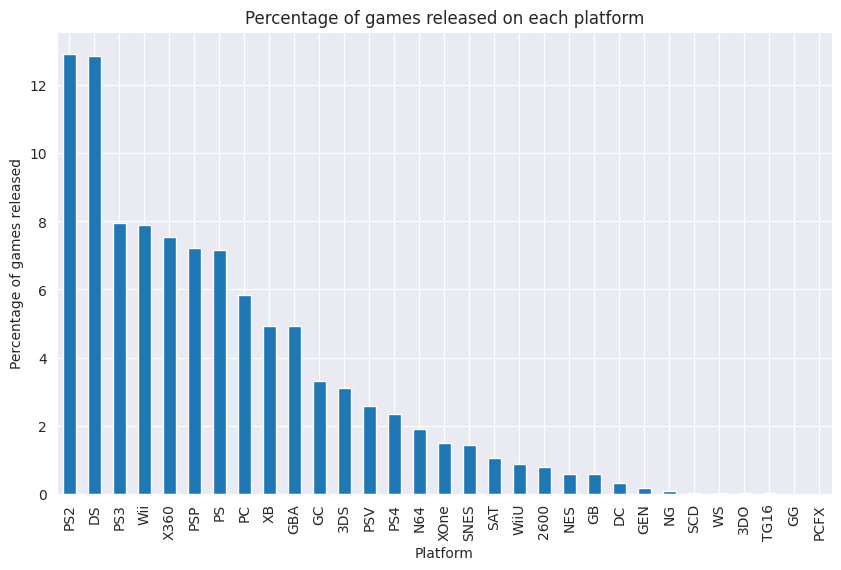

In [17]:
platform_pct = df.Platform.value_counts(normalize=True) * 100
platform_pct.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Platform')
plt.ylabel('Percentage of games released')
plt.title('Percentage of games released on each platform')
plt.show()


# The amount of games released each year

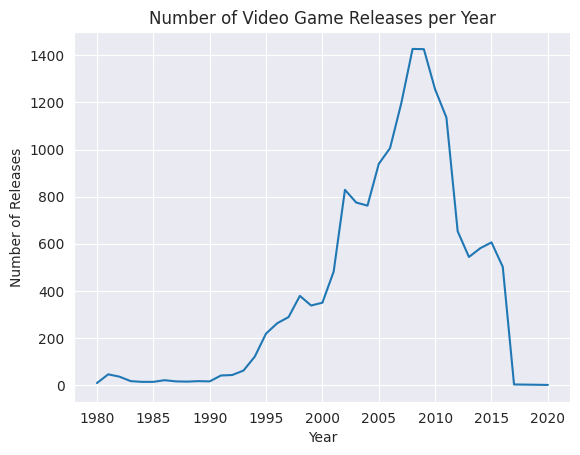

In [18]:
year_counts = df.groupby("Year_of_Release").size()
plt.plot(year_counts.index, year_counts.values)
plt.title("Number of Video Game Releases per Year")
plt.xlabel("Year")
plt.ylabel("Number of Releases")
plt.show()

In [19]:
df_filtered = df[df['Year_of_Release'] >= 2020]

In [20]:
df_filtered.head(100)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
5936,Imagine: Makeup Artist,DS,2020.0,Simulation,Ubisoft,0.27,0.0,0.0,0.02,0.29,NaN,NaN,tbd,NaN,Ubisoft,E


was no data in this dataframe of games recorded past 2020...

# What about Genres and Ratings?

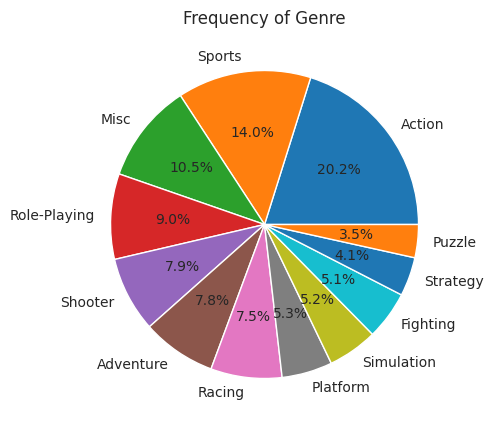

In [21]:
df.Genre.value_counts().plot(kind='pie', figsize=(12,5),autopct='%0.1f%%')
plt.ylabel('')
plt.title("Frequency of Genre")
plt.show()

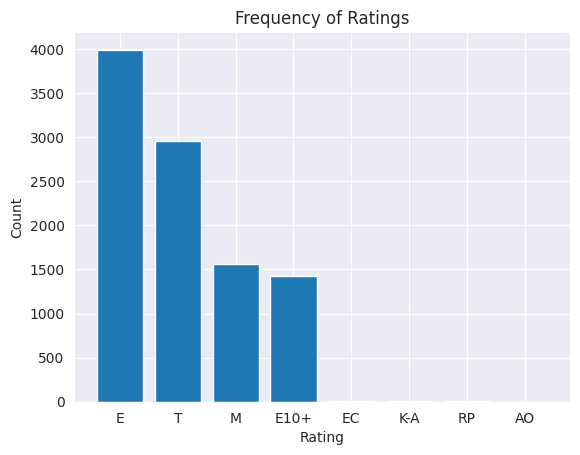

In [22]:
rating = df['Rating'].value_counts()
plt.bar(rating.index, rating.values)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Frequency of Ratings')
plt.show()

In [23]:
!pip install ydata-profiling
import ydata_profiling as pp # Changed import to ydata_profiling

# Generate the EDA report
report = pp.ProfileReport(df)

# Save the report to an HTML file
report.to_file(output_file='report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [24]:
from IPython.display import HTML
HTML(filename='report.html')

Output hidden; open in https://colab.research.google.com to view.